# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2381 Соколов Сергей Александрович и Тищенко Артем Михайлович. Вариант №2.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения


В работе анализируются следующие методы численного интегрирования:

- Формула прямоугольников: $y_{n+1} = y_n + s_{n+0.5}$
- Формула трапеций: $y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1})$
- Формула Симпсона: $y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1})$
- Формула по «правилу 3/8»: $y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_{n} + x_{n-1})$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.


## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f = np.linspace(0.01, 1, 10000)
w = 2 * np.pi * f

### Задание 1

Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

**Формула прямоугольника**

$y_{n+1} = y_n + s_{n+0.5},\quad y_0 = 0$

$s_n = e^{iωn},\quad y_n = H(ω) e^{iωn}$

Тогда при подстановке в формулу $y_{n+1}$:

$H(ω) e^{iω(n+1)}= H(ω) e^{iωn} + e^{iω(n+0.5)}$

$H(ω) ⋅ (e^{iω} - 1) = e^{iω/2}$, если выразить передаточную функцию и воспользоваться экспоненциальной формой записи синуса:
$H(ω) = \frac{1}{2i ⋅ sin(ω/2)}$, тогда

$\tilde{H}(f) = \frac{1}{2i ⋅ sin(\pi f)}$

Также, при рассмотрении y(t) = $\int s(t) dt = \frac{e^{iωt}}{iω} = H(ω) e^{iω}$. А, значит, точное значение $H(ω) = 1/iω$

Отношение приближенного к точному значению равно: $\frac{ω/2}{\sin(\omega/2)}$

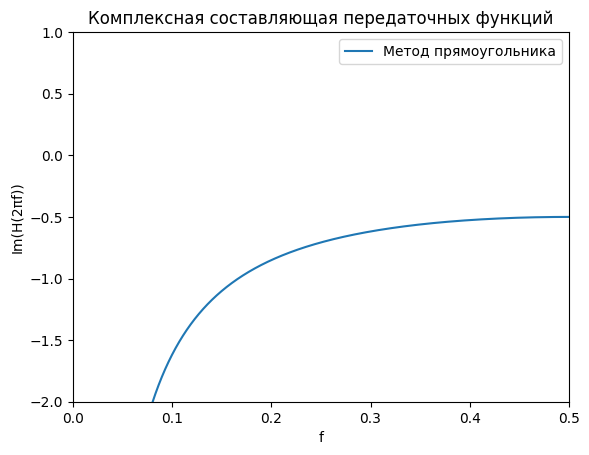

In [ ]:
H_rect = np.imag(1/(2j*np.sin(w / 2)))

plt.plot(f, H_rect, label="Метод прямоугольника")
plt.xlim(0, 0.5)
plt.ylim(-2, 1)
plt.xlabel('f')
plt.ylabel('Im(H(2πf))')
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()

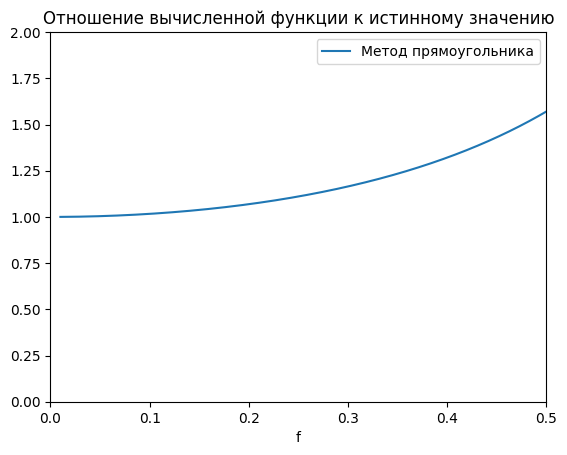

In [ ]:
r_rect = (w / 2) / (np.sin(w / 2))

plt.plot(f, r_rect, label="Метод прямоугольника")
plt.ylim(0, 2)
plt.xlim(0, 0.5)
plt.xlabel('f')
plt.title("Отношение вычисленной функции к истинному значению")
plt.legend()

plt.show()

Метод прямоугольников усиливает низкие частоты и немного подавляет высокие.

**Формула трапеции**


$y_{n+1} = y_n + \frac{1}{2} (s_n + s_{n+1}),\quad y_0 = 0$

Тогда при подстановке в формулу $y_{n+1}$:

$H(ω) e^{iω(n+1)}= H(ω) e^{iωn} + \frac{1}{2}(e^{iωn} + e^{iω(n+1)})$

$H(ω) ⋅ (e^{iω} - 1)⋅e^{iωn} = \frac{e^{iωn}}{2}(1 + e^{iω})$.

Аналогично при выражении передаточной функции, и пользуясь экспоненциальной формой записи тригонометрических функций:
$H(ω) = \frac{\cos(ω/2)}{2i ⋅ \sin(ω/2)}$, тогда

$\tilde{H}(f) = \frac{\cos(\pi f)}{2i ⋅ \sin(\pi f)}$


Отношение приближенного к точному значению равно: $\frac{ω/2}{(\cos(ω/2))^{-1} \sin(\omega/2)}$

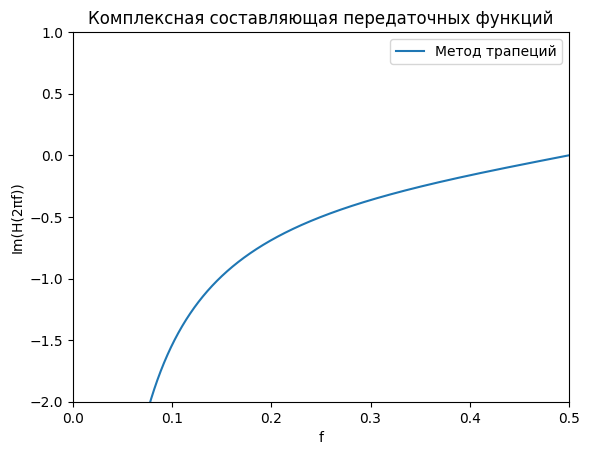

In [ ]:
H_trap = np.imag(np.cos(w / 2)/(2j*np.sin(w / 2)))

plt.plot(f, H_trap, label="Метод трапеций")
plt.xlim(0, 0.5)
plt.ylim(-2, 1)
plt.xlabel('f')
plt.ylabel('Im(H(2πf))')
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()

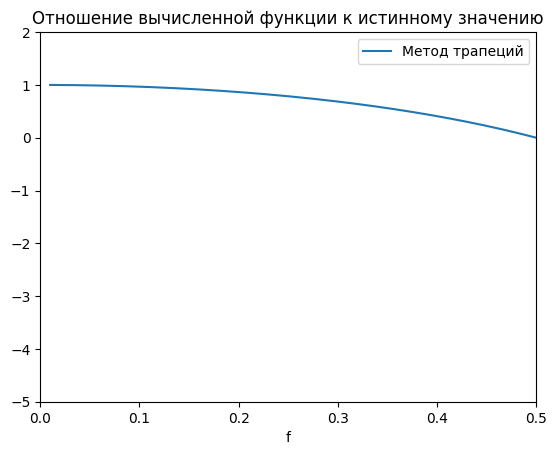

In [ ]:
r_trap = np.cos(w / 2) * (w / 2) / (np.sin(w / 2))

plt.plot(f, r_trap, label="Метод трапеций")
plt.ylim(-5, 2)
plt.xlim(0, 0.5)
plt.xlabel('f')
plt.title("Отношение вычисленной функции к истинному значению")
plt.legend()

plt.show()

Метод трапеций усиливает низкие частоты и подавляет высокие, причем подавление сильнее чем в методе прямоугольников

**Формула Симпсона**


$y_{n+1} = y_{n-1} + \frac{1}{3} (s_{n-1} + 4s_{n} + s_{n+1}),\quad y_0 = 0$

Тогда при подстановке в формулу $y_{n+1}$:

$H(ω) ⋅ e^{iω(n+1)}= H(ω) e^{iω(n-1)} + \frac{1}{3} (s_{n-1} + 4 s_{n} + s_{n+1})$

$H(ω) ⋅ (e^{iω} - e^{-iω})⋅e^{iωn} = \frac{e^{iωn}}{3}(e^{-iω} + 4 + e^{iω})$.

Аналогично выражаем передаточную функцию:
$H(ω) = \frac{1}{3}⋅ \frac{e^{-iω} + 4 + e^{iω}}{e^{iω} - e^{-iω}} =
\frac{1}{3} \left( \frac{2}{i\sin(ω)} + \frac{\cos(ω)}{i\sin(ω)} \right) =
\frac{2+\cos(\omega)}{3i \sin(ω)}$, тогда

$\tilde{H}(f) = \frac{2+\cos(2 \pi f)}{3i \sin(2 \pi f)}$


Отношение приближенного к точному значению равно: $\frac{ω/3}{(2+\cos(ω))^{-1} \sin(\omega)}$

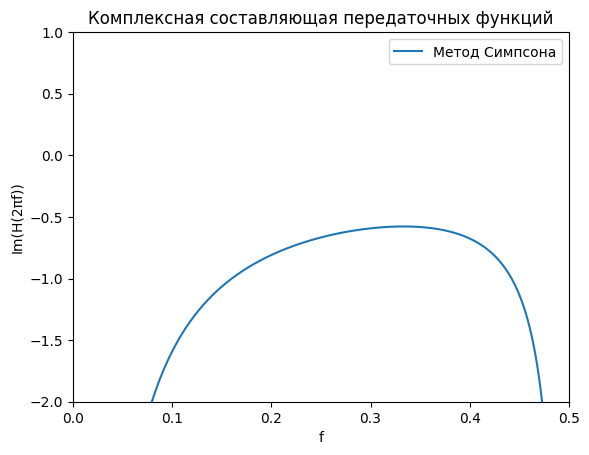

In [ ]:
H_simps = np.imag((2 + np.cos(w)) / (3j * np.sin(w)))
H_simps[abs(H_simps) > 15] = np.nan

plt.plot(f, H_simps, label="Метод Симпсона")
plt.xlim(0, 0.5)
plt.ylim(-2, 1)
plt.xlabel('f')
plt.ylabel('Im(H(2πf))')
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()

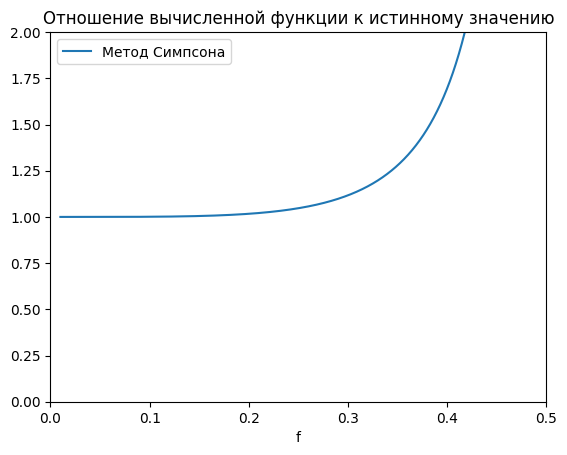

In [ ]:
r_simps = (2 + np.cos(w)) * (w / 3) / (np.sin(w))
r_simps[abs(r_simps) > 15] = np.nan

plt.plot(f, r_simps, label="Метод Симпсона")
plt.ylim(0, 2)
plt.xlim(0, 0.5)
plt.xlabel('f')
plt.title("Отношение вычисленной функции к истинному значению")
plt.legend()

plt.show()

Метод симпсона усиливает низкие частоты и в отличие от методов прямоугольников и трапеций также усиливает высокие частоты.

## Задание 2

Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»:

$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_{n} + x_{n-1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.



$H(ω) ⋅ e^{iω(n+2)}= H(ω) e^{iω(n-1)} + \frac{1}{8} (s_{n-1} + 3 s_{n} + 3 s_{n+1} + s_{n+2})$

$H(ω) ⋅ (e^{2iω} - e^{-iω}) e^{iωn} = \frac{e^{iωn}}{8}(e^{-iω} + 3 + 3 e^{iω} + e^{2iω})$.

Выражаем передаточную функцию:
$H(ω) = \frac{1}{8}⋅ \cfrac{e^{-iω} + 3 + 3 e^{iω} + e^{2iω}}{e^{2iω} - e^{-iω}} =
\frac{1}{8} ⋅ \cfrac{ e^{-\frac{3}{2} iω} + e^{\frac{3}{2} iω} + 3e^{-\frac{i\omega}{2}} + 3e^{\frac{i\omega}{2}}}{e^{-\frac{3}{2} iω} - e^{\frac{3}{2} iω}}
$

$
H(ω) = \frac{\cos(3ω / 2) + 3\cos(ω/2)}{8i \sin(3ω/2)}
$, тогда

$\tilde{H}(f) = \frac{\cos(3\pi f) + 3\cos(\pi f)}{8i \sin(3\pi f)}$

Отношение приближенного к точному значению равно:
$\frac{ω ⋅(\cos(3ω / 2) + 3\cos(ω/2))}{8 \sin(3ω/2)}$

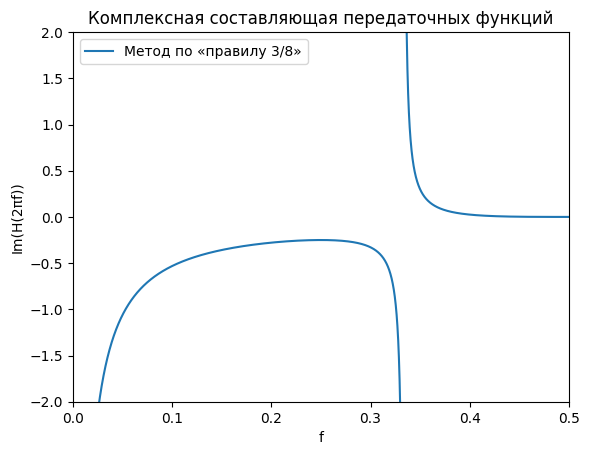

In [ ]:
H_38 = np.imag((np.cos(3 * w / 2) + 3 * np.cos(w / 2)) / (8j * np.sin(3 * w / 2)))
H_38[np.abs(H_38) > 15] = np.nan

plt.plot(f, H_38, label="Метод по «правилу 3/8»")
plt.xlim(0, 0.5)
plt.ylim(-2, 2)
plt.xlabel('f')
plt.ylabel('Im(H(2πf))')
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()

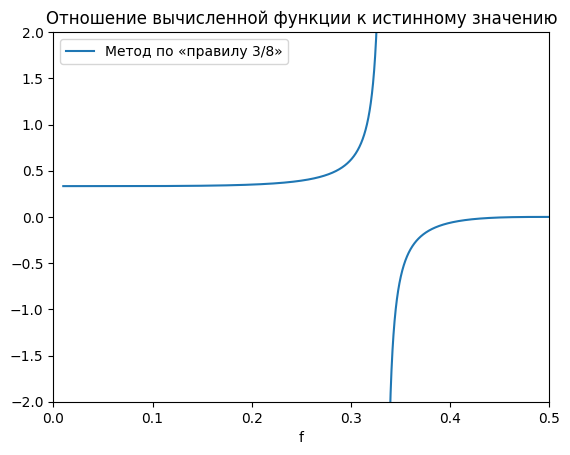

In [ ]:
r_38 = w * (np.cos(3 * w / 2) + 3 * np.cos(w / 2)) / (8 * np.sin(3 * w / 2))
r_38[np.abs(r_38) > 15] = np.nan

plt.plot(f, r_38, label="Метод по «правилу 3/8»")
plt.ylim(-2, 2)
plt.xlim(0, 0.5)
plt.xlabel('f')
plt.title("Отношение вычисленной функции к истинному значению")
plt.legend()

plt.show()

Метод по «правилу 3/8» усиливает низкие частоты, также наблюдается резкое усиление сигнала в окрестности точки $\frac{1}{3}$.

## Задание 3

Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.


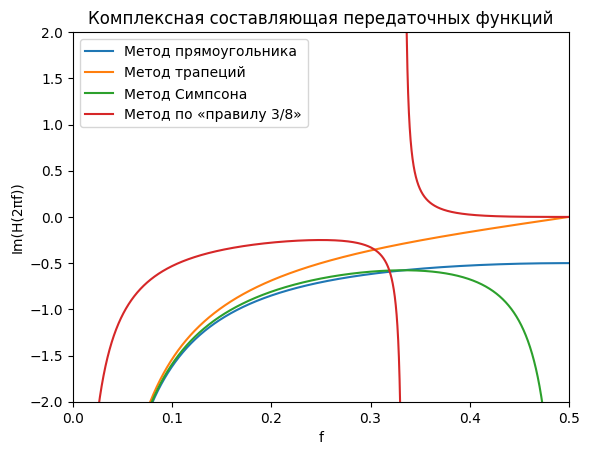

In [ ]:
plt.plot(f, H_rect, label="Метод прямоугольника")
plt.plot(f, H_trap, label="Метод трапеций")
plt.plot(f, H_simps, label="Метод Симпсона")
plt.plot(f, H_38, label="Метод по «правилу 3/8»")

plt.xlim(0, 0.5)
plt.ylim(-2, 2)
plt.xlabel('f')
plt.ylabel('Im(H(2πf))')
plt.title("Комплексная составляющая передаточных функций")
plt.legend()

plt.show()

Все методы усиливают низкие частоты. Метод Симпсона также усиливает высокие частоты, а метод по «правилу 3/8» усиливает в окрестности точки $\frac{1}{3}$. Оставшиеся частоты все методы подавляют. Усиление низких частот у методов прямоугольников, трапеций, Симпсона примерно схожи, а метод по «правилу 3/8» имеет более резкое падение.

## Выводы



Был проведен анализ частотных характеристик известных формул численного интегрирования: метода прямоугольников, метода трапеций, метода Симпсона, метода по «правилу 3/8». Все методы показали усиление низких частот, а методы Симпсона и по «правилу 3/8» усиление высоких частот и частот около точки $\frac{1}{3}$ соответственно.